In [5]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

In [6]:
training_data = datasets.FashionMNIST(
    root = 'data',
    train= True,
    download = True,
    transform = ToTensor()
)

100%|█████████████████████████████████████████████████████████████████| 26421880/26421880 [00:05<00:00, 4542280.13it/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|████████████████████████████████████████████████████████████████████████| 29515/29515 [00:00<00:00, 244578.51it/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|███████████████████████████████████████████████████████████████████| 4422102/4422102 [00:01<00:00, 3310690.47it/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████████████████████████████████████████████████████████████████████| 5148/5148 [00:00<00:00, 527412.73it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [7]:
print(type(training_data))

<class 'torchvision.datasets.mnist.FashionMNIST'>


In [9]:
training_data.data.size()

torch.Size([60000, 28, 28])

In [10]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [14]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

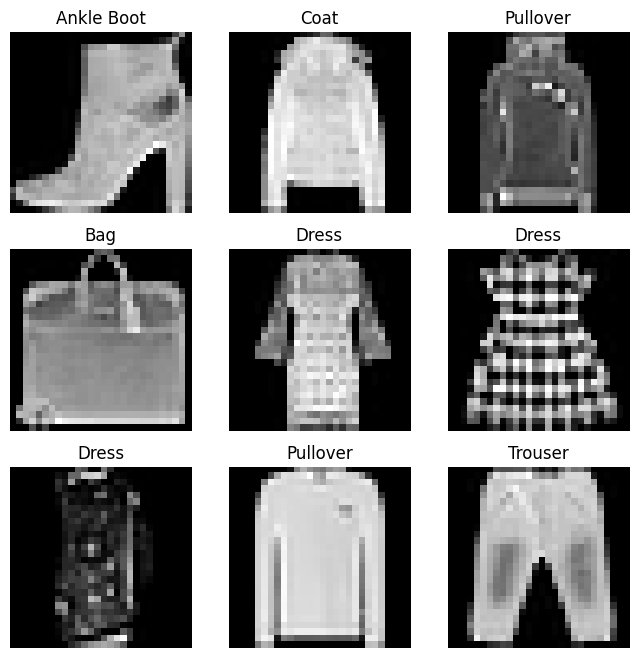

In [17]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


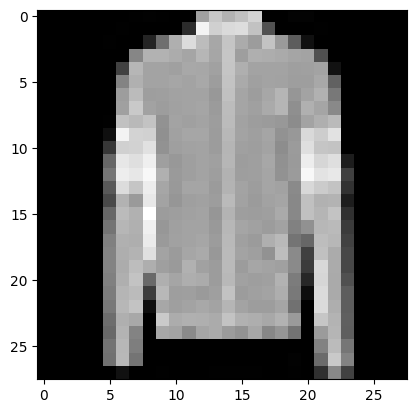

Label: Coat


In [18]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
label_name = list(labels_map.values())[label]
print(f"Label: {label_name}")

In [19]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [20]:
type(ds)

torchvision.datasets.mnist.FashionMNIST

In [22]:
print(ds[1])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
          0.0000, 0.0000, 0.1608, 0.7373, 0.4039, 0.2118, 0.1882, 0.1686,
          0.3412, 0.6588, 0.5216, 0.0627, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.1922,
          0.5333, 0.8588, 0.8471, 0.8941, 0.9255, 1.0000, 1.0000, 1.0000,
          1.0000, 0.8510, 0.8431, 0.9961, 0.9059, 0.6275, 0.1765, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0549, 0.6902, 0.8706,
          0.8784, 0.8314, 0.7961, 0.7765, 0.7686, 0.7843, 0.8431, 0.8000,
          0.7922, 0.7882, 0.7882, 0.7882, 0.8196, 0.8549, 0.8784, 0.6431,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7373, 0.8588, 0.7843,
          0.7765, 0.7922, 0.7765, 0.7804, 0.7804, 0.7882, 0.7686, 0.7765,
          0.7765, 0.7843, 0.7843, 0.7843, 0.7843, 0.7882

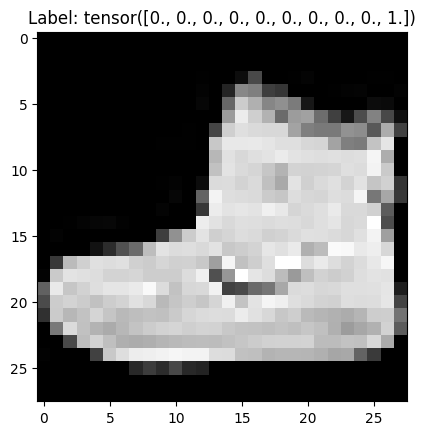

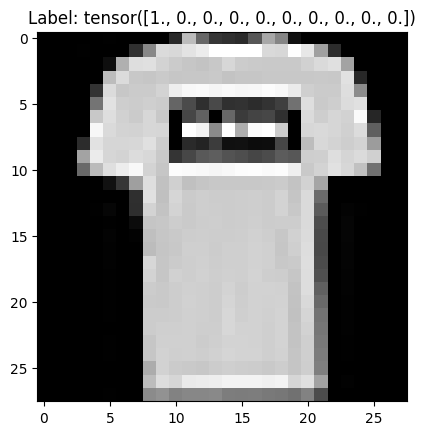

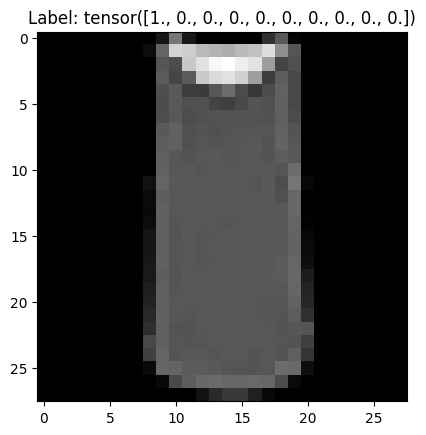

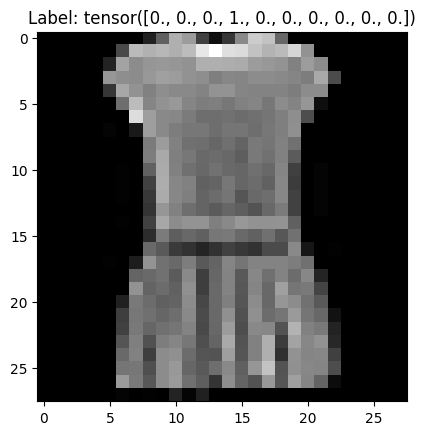

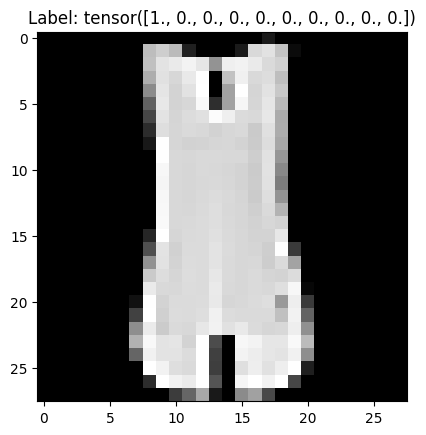

In [23]:
for i in range(5):
    image, label = ds[i]
    plt.imshow(image.squeeze().numpy(), cmap='gray')  # Convert tensor to numpy array and remove the channel dimension
    plt.title(f'Label: {label}')
    plt.show()

In [24]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


In [27]:
from torch import nn

In [28]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [29]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [35]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [38]:
def train_loop(optimizer, model, dataloader, loss_fn):
    size=len(dataloader.dataset)
    for batch, (X,y) in enumerate(dataloader):
        prediction = model(X)
        loss = loss_fn(prediction, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if(batch%100 == 0):
            loss, index = loss.item(), batch*len(X)
            print(f"loss: {loss:>7f}  [{index:>5d}/{size:>5d}]")


def test_loop(model, dataloader, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0,0
    with torch.no_grad():
        for X,y in dataloader:
            prediction = model(X)
            test_loss = loss_fn(prediction, y).item()
            correct+= (prediction.argmax(1)==y).type(torch.float).sum().item()
    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(optimizer, model, train_dataloader, loss_fn)
    test_loop(model, test_dataloader, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.304202  [    0/60000]
loss: 2.293933  [ 6400/60000]
loss: 2.280704  [12800/60000]
loss: 2.266311  [19200/60000]
loss: 2.242115  [25600/60000]
loss: 2.247182  [32000/60000]
loss: 2.240107  [38400/60000]
loss: 2.227197  [44800/60000]
loss: 2.222954  [51200/60000]
loss: 2.194863  [57600/60000]
Test Error: 
 Accuracy: 53.9%, Avg loss: 0.000215 

Epoch 2
-------------------------------
loss: 2.198388  [    0/60000]
loss: 2.208773  [ 6400/60000]
loss: 2.167353  [12800/60000]
loss: 2.185433  [19200/60000]
loss: 2.183387  [25600/60000]
loss: 2.108487  [32000/60000]
loss: 2.140291  [38400/60000]
loss: 2.057776  [44800/60000]
loss: 2.095444  [51200/60000]
loss: 2.053239  [57600/60000]
Test Error: 
 Accuracy: 53.8%, Avg loss: 0.000217 

Epoch 3
-------------------------------
loss: 2.033650  [    0/60000]
loss: 1.995415  [ 6400/60000]
loss: 1.992147  [12800/60000]
loss: 1.974424  [19200/60000]
loss: 1.936038  [25600/60000]
loss: 2.061083  [32000/600